In [1]:
from __future__ import annotations

from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
mpl.rcParams['xtick.labelsize'] = 'x-small'
mpl.rcParams['ytick.labelsize'] = 'x-small'

In [3]:
base_path = Path('./data/training-models')

In [4]:
model_paths = [
    [base_path / 'Permute-20-AAMSC-bs256-s15.0-m0.1-K10-seed0', base_path / 'Permute-50-AAMSC-bs256-s15.0-m0.1-K10-seed0', base_path / 'Permute-75-AAMSC-bs256-s15.0-m0.1-K10-seed0'],
    [base_path / 'Open-20-AAMSC-bs256-s15.0-m0.1-K10-seed0', base_path / 'Open-50-AAMSC-bs256-s15.0-m0.1-K10-seed0', base_path / 'Open-75-AAMSC-bs256-s15.0-m0.1-K3-seed0'],
    [base_path / 'Permute-20-AAMSC-bs256-s15.0-m0.1-K10-seed0', base_path / 'Permute-50-AAMSC-bs256-s15.0-m0.1-K10-seed0', base_path / 'Permute-75-AAMSC-bs256-s15.0-m0.1-K10-seed0'],
    [base_path / 'Open-20-AAMSC-bs256-s15.0-m0.1-K10-seed0', base_path / 'Open-50-AAMSC-bs256-s15.0-m0.1-K10-seed0', base_path / 'Open-75-AAMSC-bs256-s15.0-m0.1-K3-seed0'],
]
noise: list[list[tuple[str, int, str]]] = [
    [('Permute', 20, 'distance'), ('Permute', 50, 'distance'), ('Permute', 75, 'distance')],
    [('Open', 20, 'distance'), ('Open', 50, 'distance'), ('Open', 75, 'distance')],
    [('Permute', 20, 'confidence'), ('Permute', 50, 'confidence'), ('Permute', 75, 'confidence')],
    [('Open', 20, 'confidence'), ('Open', 50, 'confidence'), ('Open', 75, 'confidence')],
]

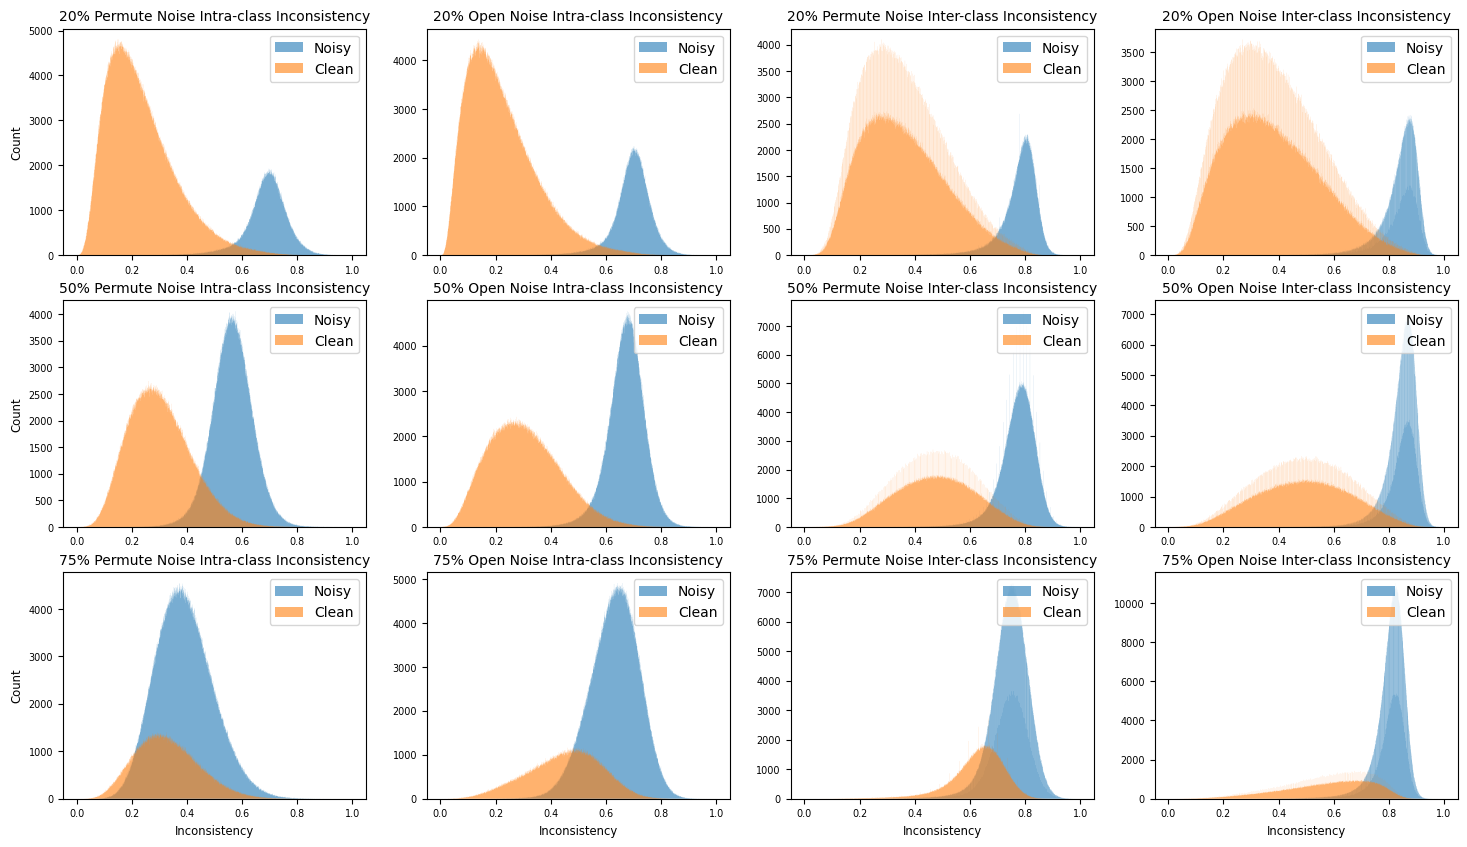

In [5]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(4):
    for j in range(3):
        ax = axes[j][i]
        model_path = model_paths[i][j]
        noise_type, noise_level, inconsistency_type = noise[i][j]

        inconsistencies = np.load(model_path / f'nld-{inconsistency_type}-inconsistencies-final.npy')
        labels = np.load(model_path / f'nld-{inconsistency_type}-noise-labels-final.npy')
        
        # We decided to not to remove outlier data based on standard deviation.
        # upper_threshold = inconsistencies.mean() + 3 * inconsistencies.std()
        # lower_threshold = inconsistencies.mean() - 3 * inconsistencies.std()
        # filtered_idx = np.where((inconsistencies < upper_threshold) & (inconsistencies > lower_threshold))[0]
        # inconsistencies = inconsistencies[filtered_idx]
        # labels = labels[filtered_idx]
        
        # Normalize data
        inconsistencies = (inconsistencies - inconsistencies.min()) / (inconsistencies.max() - inconsistencies.min())
                                    
        noisy_distance = inconsistencies[labels == True]
        clean_distance = inconsistencies[labels == False]
        
        ax.hist(noisy_distance, bins=2000, alpha=.6, histtype='stepfilled', label='Noisy')
        ax.hist(clean_distance, bins=2000, alpha=.6, histtype='stepfilled', label='Clean')
        inconsistency = 'Inter-class' if inconsistency_type == 'confidence' else 'Intra-class'
        ax.set_title(f'{noise_level}% {noise_type} Noise {inconsistency} Inconsistency', fontsize='medium')
        
        if i == 0:
            ax.set_ylabel('Count', fontsize='small')
        if j == 2:
            ax.set_xlabel('Inconsistency', fontsize='small')
        
        ax.legend()

fig.show()

In [6]:
fig.savefig('./data/aamsc-inconsistency-plot.png', transparent=True, dpi=300.0, bbox_inches='tight')